In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn statsmodels


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Load the data
df = pd.read_csv('metadata.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [5]:
# 1. Basic Dataset Information
print("\n=== Dataset Overview ===")
print(f"Total number of papers: {len(df)}")
print("\nMemory Usage:")
print(df.info(memory_usage='deep'))


=== Dataset Overview ===
Total number of papers: 1056660

Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 n


=== Temporal Analysis ===


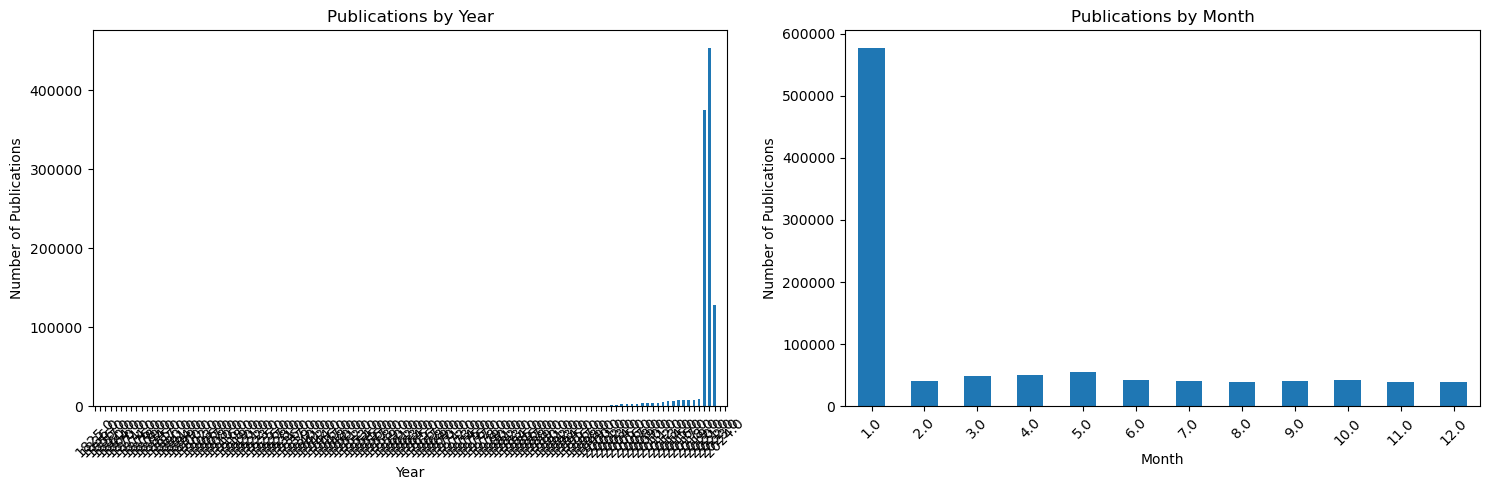


Publication Year Range:
Earliest: 1825.0
Latest: 2024.0

Publications per year:
publish_year
1825.0         1
1836.0         1
1856.0         3
1857.0         1
1860.0         2
           ...  
2020.0    375635
2021.0    453225
2022.0    128431
2023.0        17
2024.0         1
Name: count, Length: 123, dtype: int64


In [6]:
# 2. Temporal Analysis
print("\n=== Temporal Analysis ===")
# Handle different date formats
df['publish_time'] = pd.to_datetime(df['publish_time'], format='mixed')
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month

yearly_counts = df['publish_year'].value_counts().sort_index()
monthly_counts = df['publish_month'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
yearly_counts.plot(kind='bar')
plt.title('Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
monthly_counts.plot(kind='bar')
plt.title('Publications by Month')
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print temporal statistics
print("\nPublication Year Range:")
print(f"Earliest: {df['publish_year'].min()}")
print(f"Latest: {df['publish_year'].max()}")
print("\nPublications per year:")
print(yearly_counts)

In [7]:
# 3. Source Analysis
print("\n=== Publication Sources ===")
source_counts = df['source_x'].value_counts()
print("\nTop 10 Sources:")
print(source_counts.head(10))


=== Publication Sources ===

Top 10 Sources:
source_x
WHO                            450459
Medline; PMC                   150593
Medline                        131531
PMC                             80192
Medline; PMC; WHO               65968
Elsevier; Medline; PMC          49318
Medline; WHO                    43928
Elsevier; Medline; PMC; WHO     19794
MedRxiv; WHO                    13756
ArXiv                           13176
Name: count, dtype: int64


In [8]:
# 4. Journal Analysis
print("\n=== Journal Analysis ===")
journal_counts = df['journal'].value_counts()
print("\nTop 10 Journals:")
print(journal_counts.head(10))



=== Journal Analysis ===

Top 10 Journals:
journal
PLoS One                           9953
bioRxiv                            8961
Int J Environ Res Public Health    8201
BMJ                                6928
Sci Rep                            5935
Cureus                             4212
Reactions Weekly                   3891
Front Psychol                      3541
BMJ Open                           3515
Front Immunol                      3442
Name: count, dtype: int64


In [9]:
# 5. License Distribution
print("\n=== License Distribution ===")
license_dist = df['license'].value_counts()
print(license_dist)


=== License Distribution ===
license
unk            601506
no-cc          165314
cc-by          160955
els-covid       32382
cc-by-nc        26046
cc-by-nc-nd     20226
medrxiv         17970
arxiv           13698
biorxiv          7841
cc-by-nc-sa      6549
cc0               972
green-oa          896
cc-by-nd          886
bronze-oa         749
hybrid-oa         256
cc-by-sa          172
pd                145
gold-oa            97
Name: count, dtype: int64


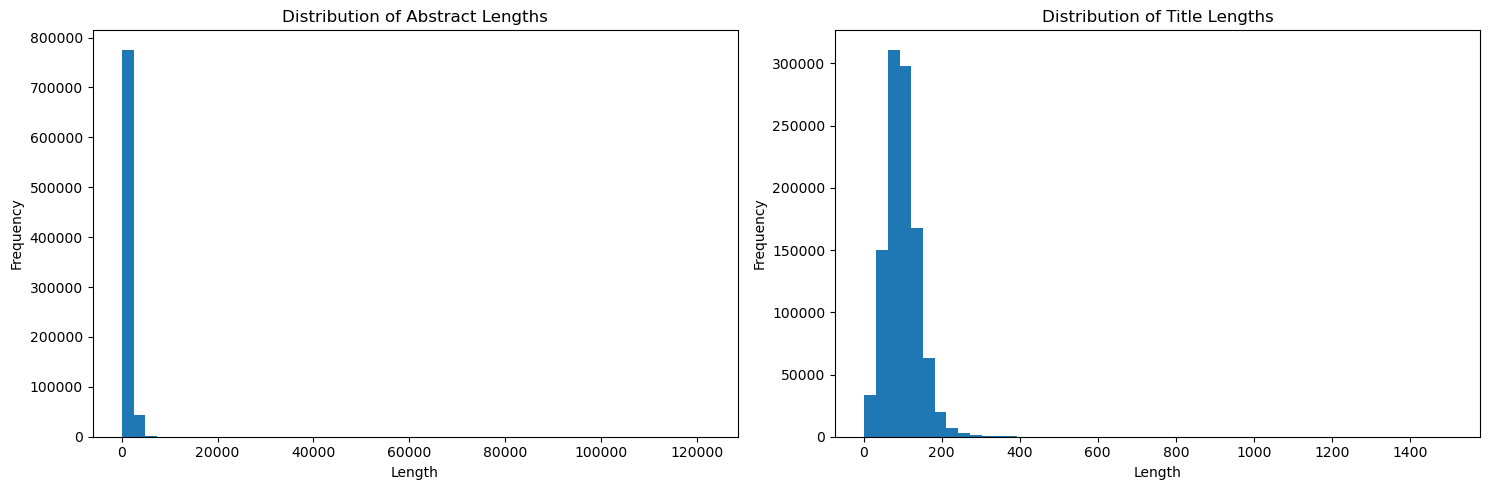

In [10]:
# 6. Text Length Analysis
df['abstract_length'] = df['abstract'].str.len()
df['title_length'] = df['title'].str.len()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df['abstract_length'].dropna(), bins=50)
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['title_length'].dropna(), bins=50)
plt.title('Distribution of Title Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
# 7. Missing Values Analysis
print("\n=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_stats = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_stats[missing_stats['Missing Values'] > 0])



=== Missing Values Analysis ===
                  Missing Values  Percentage
sha                       682894   64.627600
title                        503    0.047603
doi                       399880   37.843772
pmcid                     667089   63.131849
pubmed_id                 557728   52.782163
abstract                  235544   22.291371
publish_time                1814    0.171673
authors                    23869    2.258910
journal                    87322    8.263964
mag_id                   1056660  100.000000
who_covidence_id          573725   54.296084
arxiv_id                 1042411   98.651506
pdf_json_files            682894   64.627600
pmc_json_files            740918   70.118865
url                       369726   34.990063
s2_id                      80192    7.589196
publish_year                1814    0.171673
publish_month               1814    0.171673
abstract_length           235544   22.291371
title_length                 503    0.047603



=== Author Analysis ===


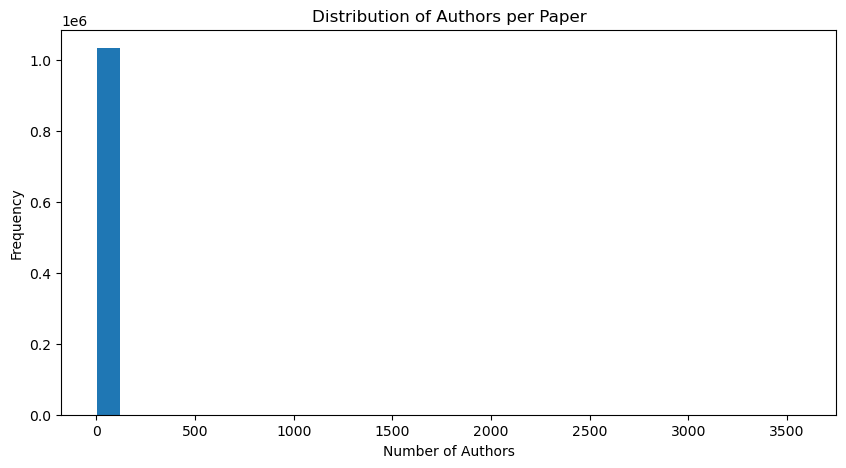

In [12]:
# 8. Author Analysis
print("\n=== Author Analysis ===")
df['author_count'] = df['authors'].str.count(';') + 1

plt.figure(figsize=(10, 5))
plt.hist(df['author_count'].dropna(), bins=30)
plt.title('Distribution of Authors per Paper')
plt.xlabel('Number of Authors')
plt.ylabel('Frequency')
plt.show()

In [13]:
# 9. DOI and PMCID Availability
print("\n=== Identifier Availability ===")
print(f"Papers with DOI: {(df['doi'] != '').sum()} ({(df['doi'] != '').mean()*100:.2f}%)")
print(f"Papers with PMCID: {(df['pmcid'] != '').sum()} ({(df['pmcid'] != '').mean()*100:.2f}%)")

# Store results in dictionary
eda_results = {
    'total_papers': len(df),
    'yearly_distribution': yearly_counts,
    'monthly_distribution': monthly_counts,
    'top_sources': source_counts.head(10),
    'top_journals': journal_counts.head(10),
    'license_distribution': license_dist,
    'abstract_length_stats': df['abstract_length'].describe(),
    'title_length_stats': df['title_length'].describe(),
    'missing_values': missing_stats,
    'author_count_stats': df['author_count'].describe()
}
print("\n=== EDA Results ===", "\n\n", eda_results)


=== Identifier Availability ===
Papers with DOI: 1056660 (100.00%)
Papers with PMCID: 1056660 (100.00%)

=== EDA Results === 

 {'total_papers': 1056660, 'yearly_distribution': publish_year
1825.0         1
1836.0         1
1856.0         3
1857.0         1
1860.0         2
           ...  
2020.0    375635
2021.0    453225
2022.0    128431
2023.0        17
2024.0         1
Name: count, Length: 123, dtype: int64, 'monthly_distribution': publish_month
1.0     576444
2.0      40168
3.0      49342
4.0      50490
5.0      54878
6.0      42411
7.0      40336
8.0      39672
9.0      41297
10.0     41657
11.0     38662
12.0     39489
Name: count, dtype: int64, 'top_sources': source_x
WHO                            450459
Medline; PMC                   150593
Medline                        131531
PMC                             80192
Medline; PMC; WHO               65968
Elsevier; Medline; PMC          49318
Medline; WHO                    43928
Elsevier; Medline; PMC; WHO     19794
MedRxiv; 

In [14]:
# Convert publish_time to datetime and sort
df['publish_time'] = pd.to_datetime(df['publish_time'], format='mixed')
df = df.sort_values('publish_time')

# Create time series data: publications per day
daily_counts = df.groupby('publish_time').size()

# Ensure we have a DatetimeIndex
if isinstance(daily_counts.index, pd.PeriodIndex):
    daily_counts.index = daily_counts.index.to_timestamp()

# Create a complete date range and reindex
date_range = pd.date_range(
    start=daily_counts.index.min(),
    end=daily_counts.index.max(),
    freq='D'
)

daily_counts

publish_time
1825-01-01      1
1836-01-01      1
1856-04-01      1
1856-06-01      1
1856-10-01      1
             ... 
2022-12-13      1
2022-12-30      1
2022-12-31    111
2023-01-01     17
2024-04-20      1
Length: 8016, dtype: int64

In [15]:
# Reindex with the complete date range and fill missing values with 0
ts_data = daily_counts.reindex(date_range, fill_value=0)

# Ensure the index has frequency information
ts_data.index = pd.DatetimeIndex(ts_data.index, freq='D')

In [16]:
# Check if there's enough data
if len(ts_data) < 2:
    print("Error: Not enough data points for time series analysis")
else:
    None

In [17]:
# Fit ARIMA model
model = ARIMA(ts_data, order=(1,1,1), freq='D')
results = model.fit()

In [18]:
# Make predictions for next 30 days
predictions = results.predict(start=len(ts_data), end=len(ts_data)+30)

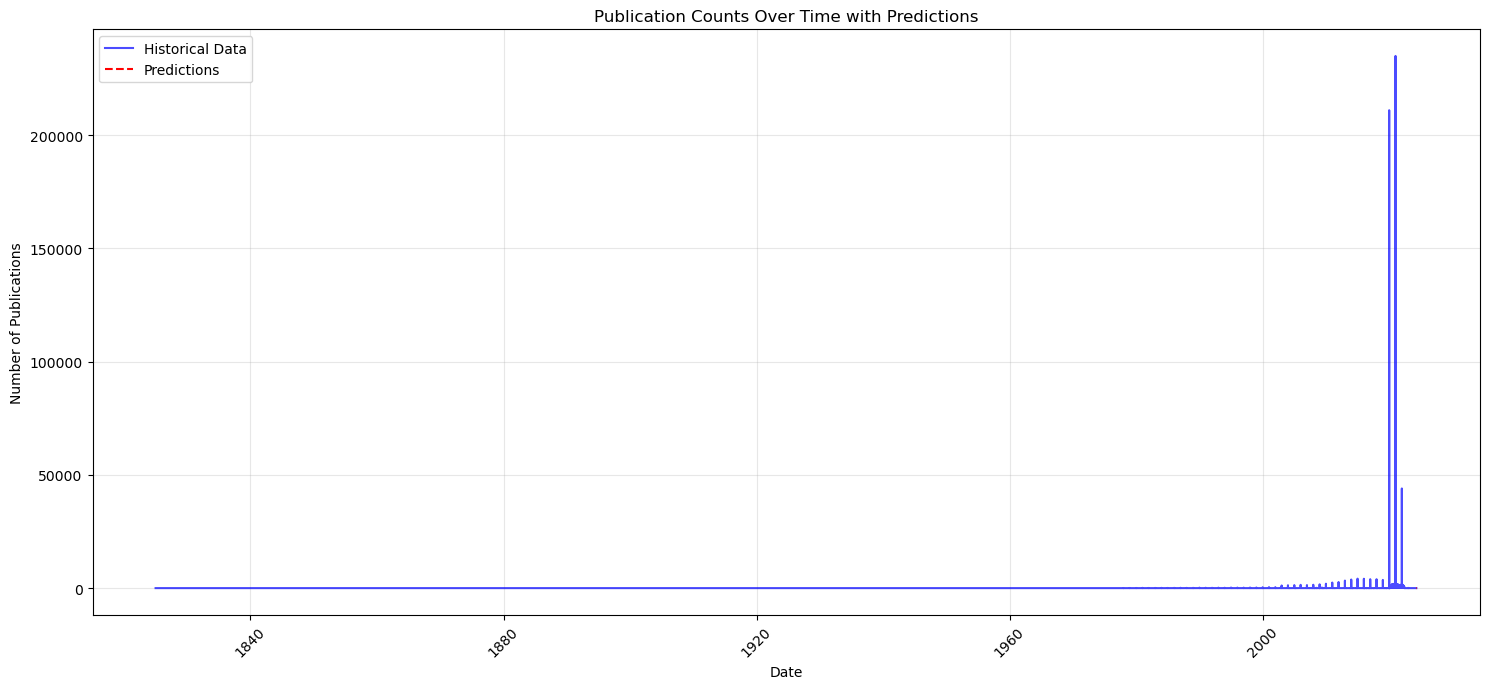

In [19]:
plt.figure(figsize=(15, 7))

# Plot original data
plt.plot(ts_data.index, ts_data.values, 
        label='Historical Data', color='blue', alpha=0.7)

# Plot predictions
plt.plot(predictions.index, predictions.values, 
        label='Predictions', color='red', linestyle='--')

plt.title('Publication Counts Over Time with Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
def develop_time_series_model(df):
    try:
        # Convert publish_time to datetime and sort
        df['publish_time'] = pd.to_datetime(df['publish_time'], format='mixed')
        df = df.sort_values('publish_time')
        
        # Create time series data: publications per day
        daily_counts = df.groupby('publish_time').size()
        
        # Ensure we have a DatetimeIndex
        if isinstance(daily_counts.index, pd.PeriodIndex):
            daily_counts.index = daily_counts.index.to_timestamp()
        
        # Create a complete date range and reindex
        date_range = pd.date_range(
            start=daily_counts.index.min(),
            end=daily_counts.index.max(),
            freq='D'
        )
        
        # Reindex with the complete date range and fill missing values with 0
        ts_data = daily_counts.reindex(date_range, fill_value=0)
        
        # Ensure the index has frequency information
        ts_data.index = pd.DatetimeIndex(ts_data.index, freq='D')
        
        # Check if there's enough data
        if len(ts_data) < 2:
            print("Error: Not enough data points for time series analysis")
            return None, None, None
        
        # Fit ARIMA model with error handling
        try:
            model = ARIMA(ts_data, order=(1,1,1))
            results = model.fit()
            
            # Make predictions for next 30 days
            forecast_steps = 30
            
            # Generate future dates for predictions
            last_date = ts_data.index[-1]
            
            # Generate predictions
            predictions = results.forecast(steps=forecast_steps)
            #predictions.index = prediction_dates
            
            # Print model summary
            print("\nModel Summary:")
            print(results.summary().tables[1])
            
            return predictions, results, ts_data
            
        except Exception as model_error:
            print(f"Error in ARIMA modeling: {model_error}")
            
            # Try with different ARIMA parameters
            try:
                model = ARIMA(ts_data, order=(0,1,1))  # Simpler model
                results = model.fit()
                
                # Generate predictions
                predictions = results.forecast(steps=forecast_steps)
                
                # Generate future dates for predictions
                last_date = ts_data.index[-1]
                #predictions.index = prediction_dates
                
                return predictions, results, ts_data
                
            except Exception as backup_error:
                print(f"Error in backup ARIMA modeling: {backup_error}")
                return None, None, None
    
    except Exception as e:
        print(f"Error in time series modeling: {e}")
        return None, None, None

def plot_time_series_results(ts_data, predictions):
    plt.figure(figsize=(15, 7))
    
    # Plot original data
    plt.plot(ts_data.index, ts_data.values, 
            label='Historical Data', color='blue', alpha=0.7)
    
    # Plot predictions
    plt.plot(predictions.index, predictions.values, 
            label='Predictions', color='red', linestyle='--')
    
    plt.title('Publication Counts Over Time with Predictions')
    plt.xlabel('Date')
    plt.ylabel('Number of Publications')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [21]:
# Develop time series model
ts_results = develop_time_series_model(df)
if ts_results[0] is not None:
    ts_predictions, ts_model, historical_data = ts_results
    print("\nTime series model developed successfully")
    


Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0071      0.003      2.231      0.026       0.001       0.013
ma.L1         -1.0000   9.83e-05  -1.02e+04      0.000      -1.000      -1.000
sigma2      1.402e+06     70.067      2e+04      0.000     1.4e+06     1.4e+06

Time series model developed successfully


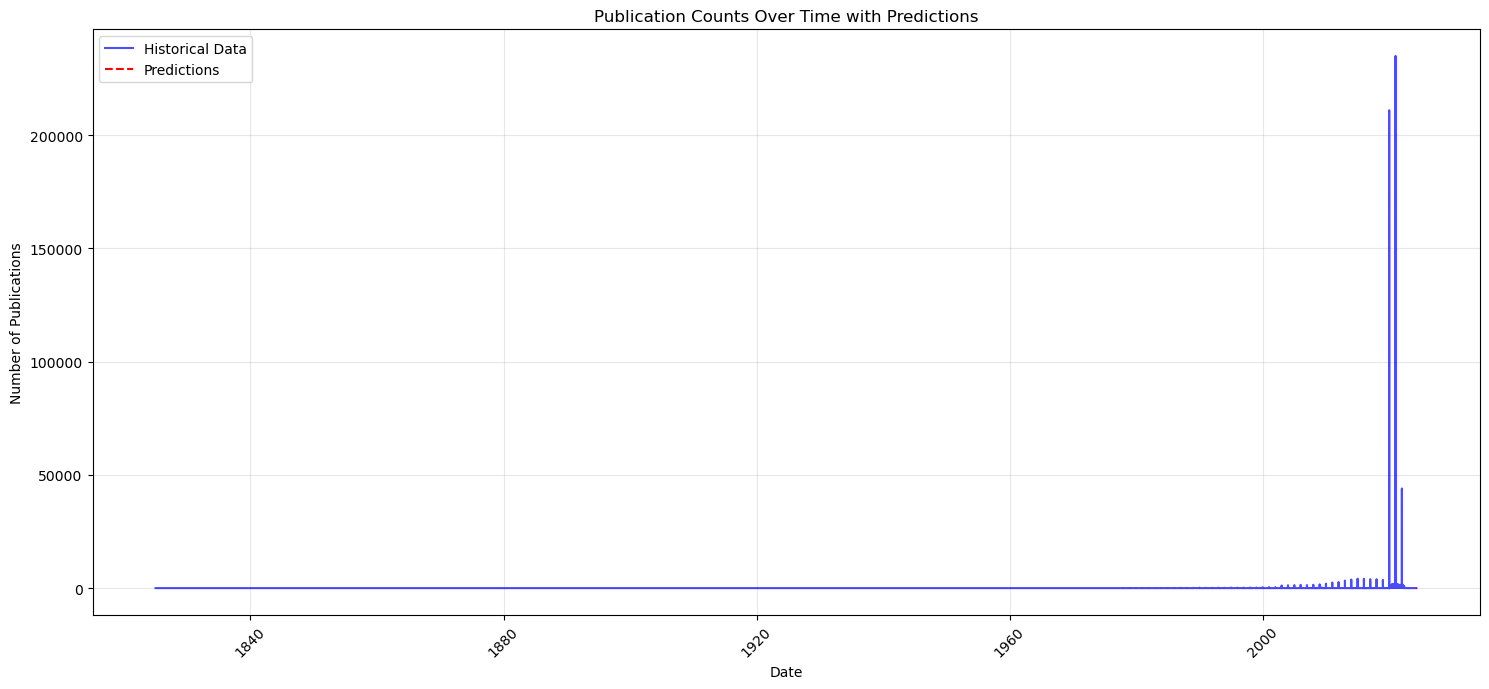


Time Series Statistics:
Total days in historical data: 72794
Date range: 1825-01-01 00:00:00 to 2024-04-20 00:00:00
Mean daily publications: 14.49
Max daily publications: 234967


In [22]:
# Plot the results
plot_time_series_results(historical_data, ts_predictions)

# Print some statistics
print("\nTime Series Statistics:")
print(f"Total days in historical data: {len(historical_data)}")
print(f"Date range: {historical_data.index.min()} to {historical_data.index.max()}")
print(f"Mean daily publications: {historical_data.mean():.2f}")
print(f"Max daily publications: {historical_data.max():.0f}")



Trend Analysis:
Monthly average publications: 14.36
Trend (positive means increasing): 0.03


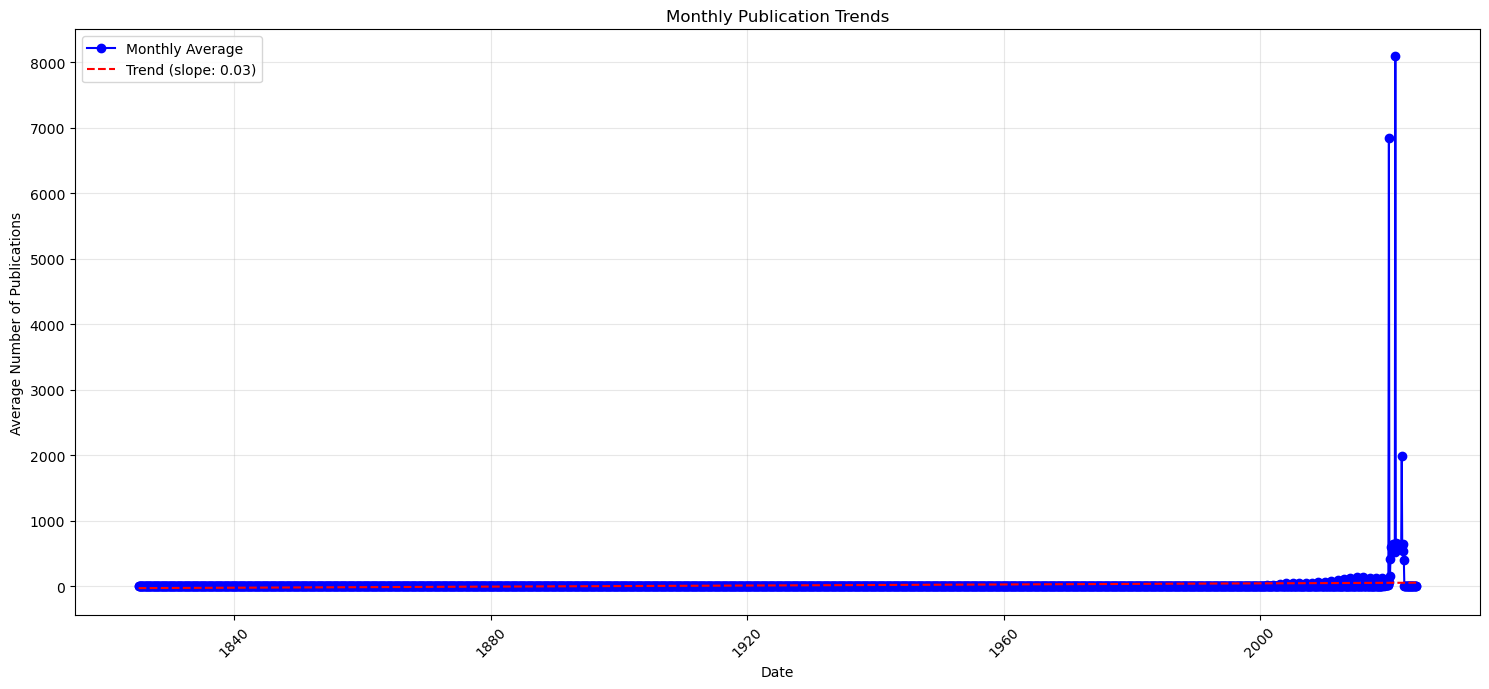

In [23]:
# Additional analysis
print("\nTrend Analysis:")
monthly_avg = historical_data.resample('ME').mean()  # Using 'ME' instead of 'M'
print(f"Monthly average publications: {monthly_avg.mean():.2f}")

# Calculate trend using numpy's polyfit
x = np.arange(len(monthly_avg))
trend = np.polyfit(x, monthly_avg.values, 1)[0]
print(f"Trend (positive means increasing): {trend:.2f}")

# Optional: Add visualization of the trend
plt.figure(figsize=(15, 7))
plt.plot(monthly_avg.index, monthly_avg.values, 
         label='Monthly Average', color='blue', marker='o')

# Add trend line
trend_line = np.poly1d(np.polyfit(range(len(monthly_avg)), monthly_avg.values, 1))
plt.plot(monthly_avg.index, trend_line(range(len(monthly_avg))), 
         'r--', label=f'Trend (slope: {trend:.2f})')

plt.title('Monthly Publication Trends')
plt.xlabel('Date')
plt.ylabel('Average Number of Publications')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
def evaluate_time_series_model(actual, predictions, model_results):   
    metrics = {}
    
    try:
        # Basic error metrics
        metrics['rmse'] = np.sqrt(mean_squared_error(actual, model_results.fittedvalues))
        metrics['mae'] = mean_absolute_error(actual, model_results.fittedvalues)
        metrics['mape'] = np.mean(np.abs((actual - model_results.fittedvalues) / actual)) * 100
        metrics['r2'] = r2_score(actual, model_results.fittedvalues)
        
        # Calculate residuals
        residuals = actual - model_results.fittedvalues
        metrics['residual_mean'] = residuals.mean()
        metrics['residual_std'] = residuals.std()
        
        # Information Criteria
        metrics['aic'] = model_results.aic
        metrics['bic'] = model_results.bic
        
        # Forecast accuracy (for the last n points where n = len(predictions))
        n_test = len(predictions)
        actual_test = actual[-n_test:]
        fitted_test = model_results.fittedvalues[-n_test:]
        
        metrics['forecast_rmse'] = np.sqrt(mean_squared_error(actual_test, fitted_test))
        metrics['forecast_mape'] = np.mean(np.abs((actual_test - fitted_test) / actual_test)) * 100
        
        # Directional accuracy (whether the model correctly predicts up/down movements)
        actual_diff = np.diff(actual) > 0
        pred_diff = np.diff(model_results.fittedvalues) > 0
        metrics['directional_accuracy'] = np.mean(actual_diff == pred_diff) * 100
        
        return metrics
        
    except Exception as e:
        print(f"Error in model evaluation: {e}")
        return None

def print_evaluation_results(metrics):
    """
    Print evaluation metrics in a formatted way
    """
    if metrics is None:
        print("No metrics available to display")
        return
    
    print("\nModel Evaluation Metrics:")
    print("=" * 50)
    
    # Format metrics into categories
    print("\nAccuracy Metrics:")
    print(f"RMSE: {metrics['rmse']:.4f}")
    print(f"MAE: {metrics['mae']:.4f}")
    print(f"MAPE: {metrics['mape']:.2f}%")
    print(f"R-squared: {metrics['r2']:.4f}")
    
    print("\nForecast Performance:")
    print(f"Forecast RMSE: {metrics['forecast_rmse']:.4f}")
    print(f"Forecast MAPE: {metrics['forecast_mape']:.2f}%")
    print(f"Directional Accuracy: {metrics['directional_accuracy']:.2f}%")
    
    print("\nModel Diagnostics:")
    print(f"AIC: {metrics['aic']:.2f}")
    print(f"BIC: {metrics['bic']:.2f}")
    print(f"Residual Mean: {metrics['residual_mean']:.4f}")
    print(f"Residual Std: {metrics['residual_std']:.4f}")

def plot_model_diagnostics(actual, predictions, model_results):
    """
    Create diagnostic plots for the time series model
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Actual vs Fitted
    axes[0, 0].scatter(actual, model_results.fittedvalues, alpha=0.5)
    axes[0, 0].plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Values')
    axes[0, 0].set_ylabel('Fitted Values')
    axes[0, 0].set_title('Actual vs Fitted Values')
    
    # Plot 2: Residuals over time
    residuals = actual - model_results.fittedvalues
    axes[0, 1].plot(actual.index, residuals)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Residual')
    axes[0, 1].set_title('Residuals Over Time')
    
    # Plot 3: Residual histogram
    axes[1, 0].hist(residuals, bins=30)
    axes[1, 0].set_xlabel('Residual Value')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Residual Distribution')
    
    # Plot 4: QQ Plot
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Normal Q-Q Plot')
    
    plt.tight_layout()
    plt.show()


Model Evaluation Metrics:

Accuracy Metrics:
RMSE: 1184.3844
MAE: 14.4558
MAPE: inf%
R-squared: 0.0000

Forecast Performance:
Forecast RMSE: 14.9511
Forecast MAPE: inf%
Directional Accuracy: 91.05%

Model Diagnostics:
AIC: 1236903.27
BIC: 1236930.85
Residual Mean: 14.0661
Residual Std: 1184.3090


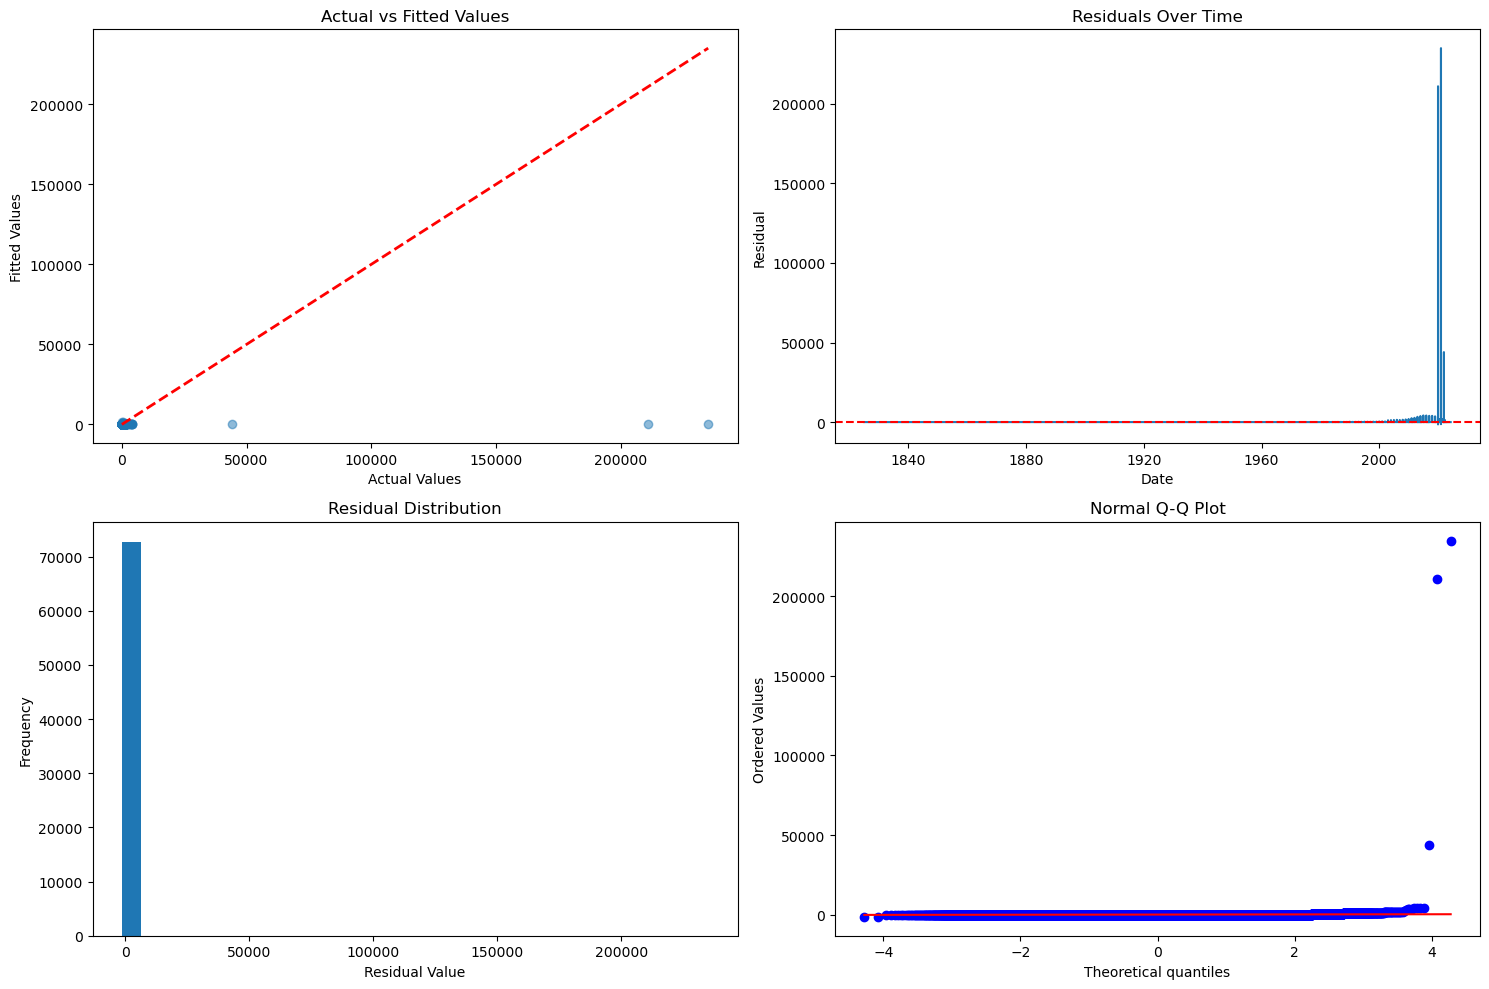

In [25]:
if ts_results[0] is not None:
    ts_predictions, ts_model, historical_data = ts_results
    
    # Calculate evaluation metrics
    metrics = evaluate_time_series_model(historical_data, ts_predictions, ts_model)
    
    # Print formatted results
    print_evaluation_results(metrics)
    
    # Create diagnostic plots
    plot_model_diagnostics(historical_data, ts_predictions, ts_model)

In [26]:
def create_derived_variables(df, historical_data):
    try:
        # Convert to DataFrame if Series
        if isinstance(historical_data, pd.Series):
            derived_df = historical_data.to_frame('daily_count')
        else:
            derived_df = historical_data.copy()
            
        # 1. Rolling statistics
        derived_df['7day_moving_avg'] = derived_df['daily_count'].rolling(window=7).mean()
        derived_df['30day_moving_avg'] = derived_df['daily_count'].rolling(window=30).mean()
        
        # 2. Growth rates
        derived_df['daily_growth_rate'] = derived_df['daily_count'].pct_change()
        derived_df['weekly_growth_rate'] = derived_df['7day_moving_avg'].pct_change(7)
        derived_df['monthly_growth_rate'] = derived_df['30day_moving_avg'].pct_change(30)
        
        # 3. Relative changes
        derived_df['relative_to_prev_week'] = derived_df['daily_count'] / derived_df['daily_count'].shift(7)
        derived_df['relative_to_prev_month'] = derived_df['daily_count'] / derived_df['daily_count'].shift(30)
        
        # 4. Cumulative metrics
        derived_df['cumulative_publications'] = derived_df['daily_count'].cumsum()
        derived_df['cumulative_growth_rate'] = derived_df['cumulative_publications'].pct_change()
        
        # 5. Volatility measures
        derived_df['7day_volatility'] = derived_df['daily_count'].rolling(window=7).std()
        derived_df['30day_volatility'] = derived_df['daily_count'].rolling(window=30).std()
        
        # 6. Acceleration metrics
        derived_df['publication_acceleration'] = derived_df['daily_growth_rate'].diff()
        derived_df['weekly_acceleration'] = derived_df['weekly_growth_rate'].diff()
        
        # 7. Seasonal components
        derived_df['day_of_week'] = derived_df.index.dayofweek
        derived_df['month'] = derived_df.index.month
        derived_df['quarter'] = derived_df.index.quarter
        
        # 8. Relative intensity metrics
        derived_df['intensity_vs_weekly_avg'] = derived_df['daily_count'] / derived_df['7day_moving_avg']
        derived_df['intensity_vs_monthly_avg'] = derived_df['daily_count'] / derived_df['30day_moving_avg']
        
        return derived_df
        
    except Exception as e:
        print(f"Error in creating derived variables: {e}")
        return None

def analyze_derived_variables(derived_df):
    """
    Analyze and visualize the derived variables
    """
    print("\nDerived Variables Analysis:")
    print("=" * 50)
    
    # 1. Basic statistics
    print("\nBasic Statistics:")
    print(derived_df.describe())
    
    # 2. Correlation analysis
    correlation_matrix = derived_df.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Derived Variables')
    plt.tight_layout()
    plt.show()
    
    # 3. Time series decomposition
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    decomposition = seasonal_decompose(derived_df['daily_count'], period=7)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=ax1)
    ax1.set_title('Observed')
    decomposition.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    decomposition.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    plt.tight_layout()
    plt.show()
    
    # 4. Growth rate analysis
    plt.figure(figsize=(15, 6))
    plt.plot(derived_df.index, derived_df['daily_growth_rate'], label='Daily Growth Rate')
    plt.plot(derived_df.index, derived_df['weekly_growth_rate'], label='Weekly Growth Rate')
    plt.plot(derived_df.index, derived_df['monthly_growth_rate'], label='Monthly Growth Rate')
    plt.title('Publication Growth Rates Over Time')
    plt.xlabel('Date')
    plt.ylabel('Growth Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 5. Seasonal patterns
    plt.figure(figsize=(15, 5))
    
    # Day of week patterns
    plt.subplot(1, 2, 1)
    plt.title('Average Publications by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Publications')
    
    # Monthly patterns
    plt.subplot(1, 2, 2)
    plt.xlabel('Month')
    plt.ylabel('Average Publications')
    
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix


Derived Variables Analysis:

Basic Statistics:
         daily_count  7day_moving_avg  30day_moving_avg  daily_growth_rate  \
count   72794.000000     72788.000000      72765.000000        9576.000000   
mean       14.490837        14.492008         14.496586                inf   
std      1184.419383       455.428254        232.572219                NaN   
min         0.000000         0.000000          0.000000          -1.000000   
25%         0.000000         0.000000          0.000000          -0.666667   
50%         0.000000         0.000000          0.000000           0.000000   
75%         0.000000         0.000000          0.033333           2.000000   
max    234967.000000     34155.285714       8388.200000                inf   

       weekly_growth_rate  monthly_growth_rate  relative_to_prev_week  \
count        1.646300e+04         2.390800e+04            9633.000000   
mean                  inf                  inf                    inf   
std                   NaN     

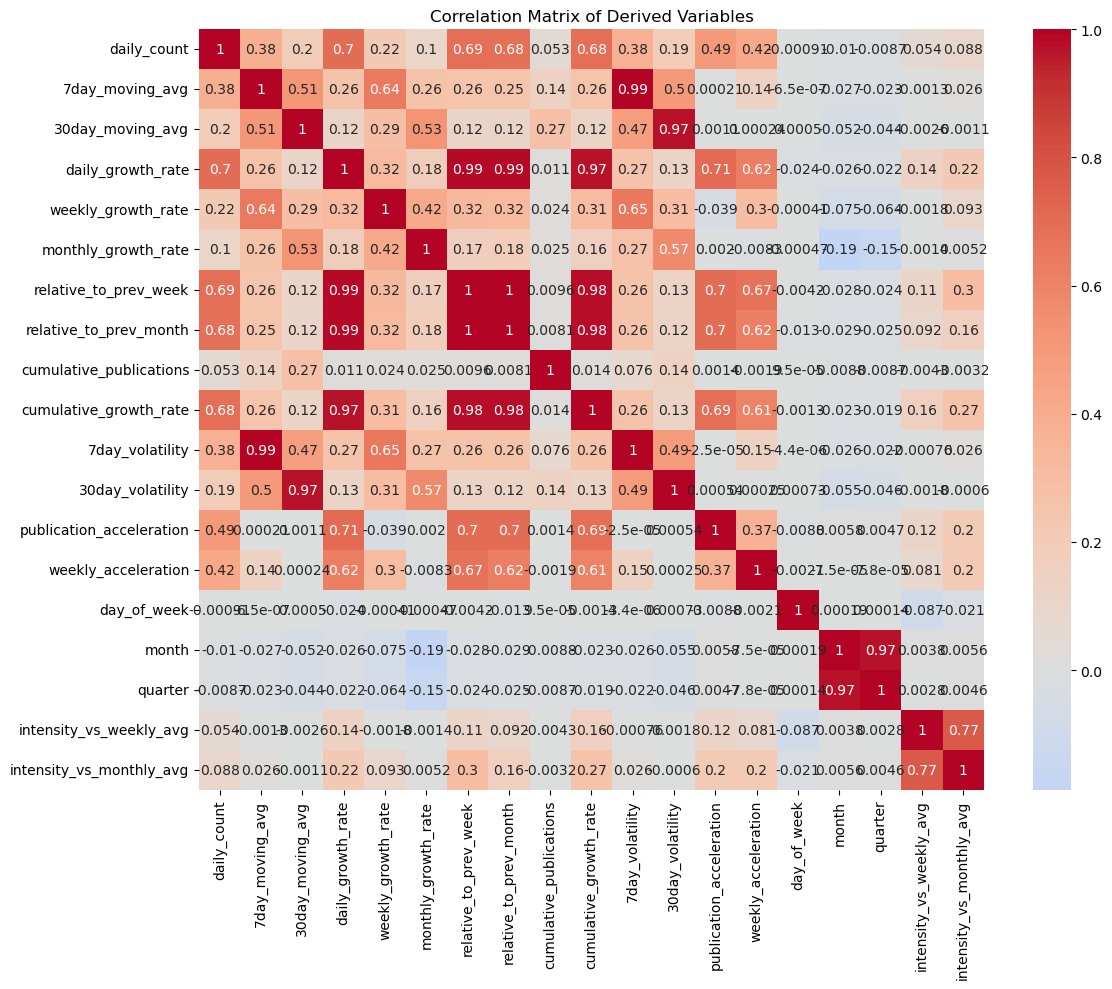

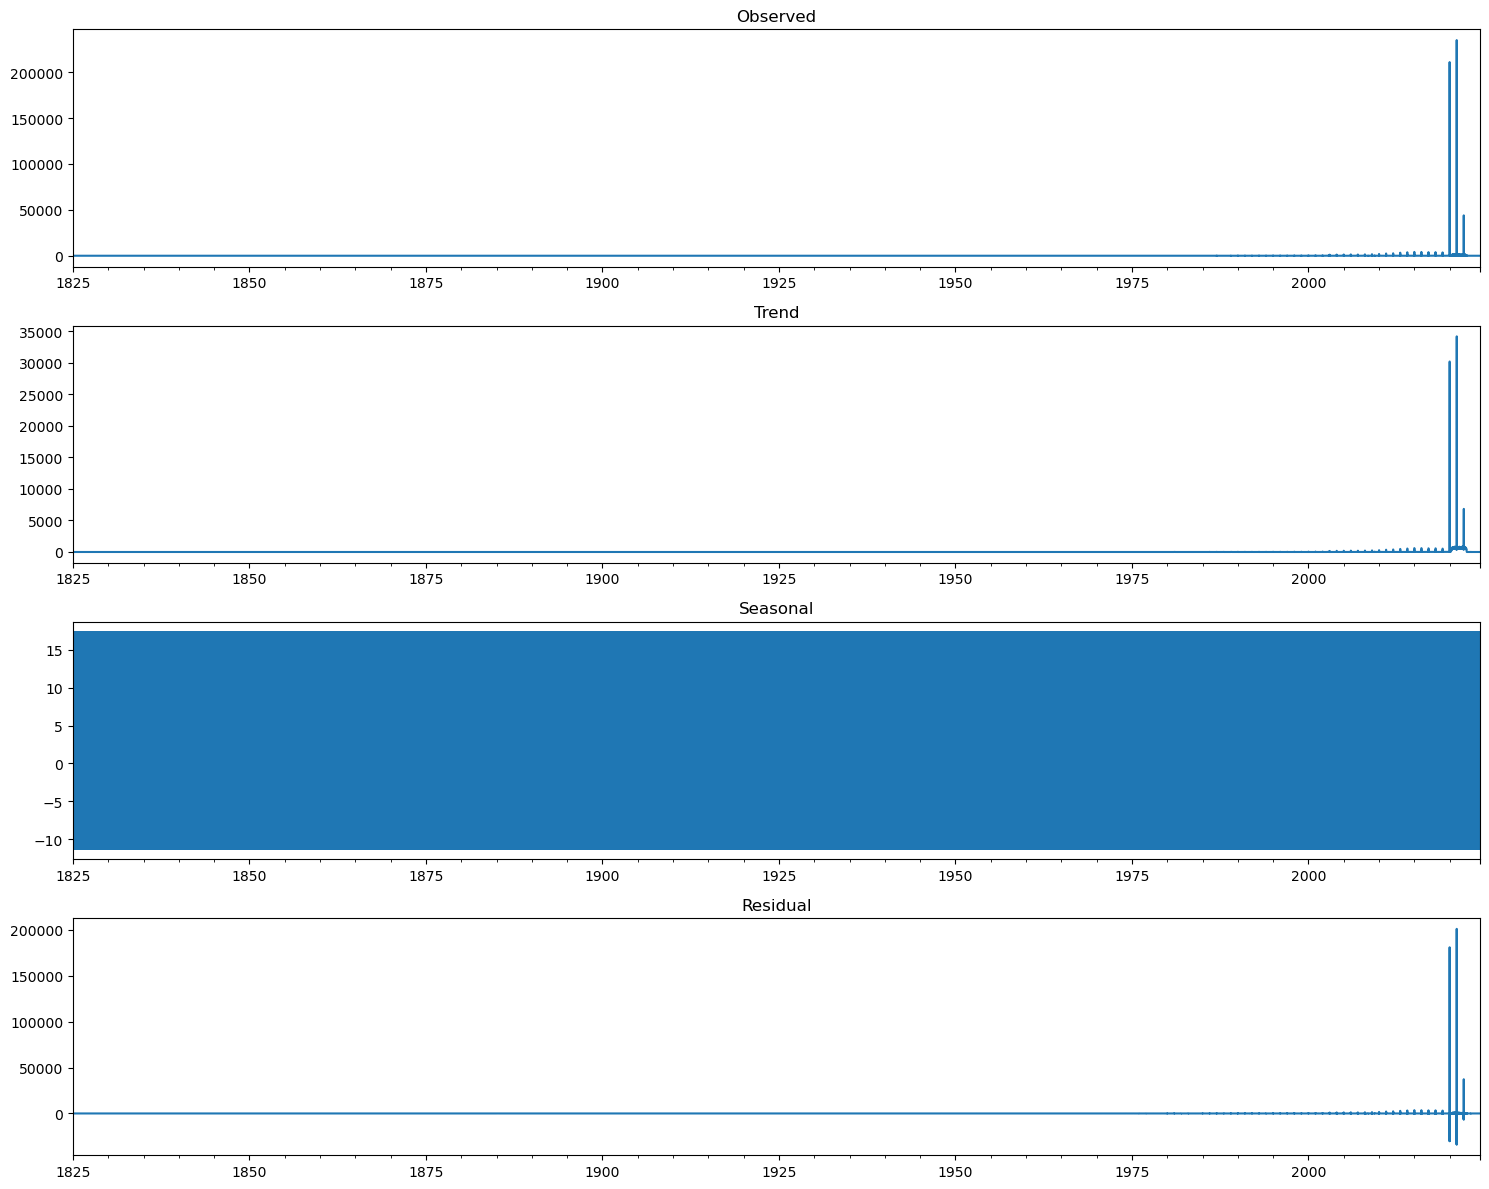

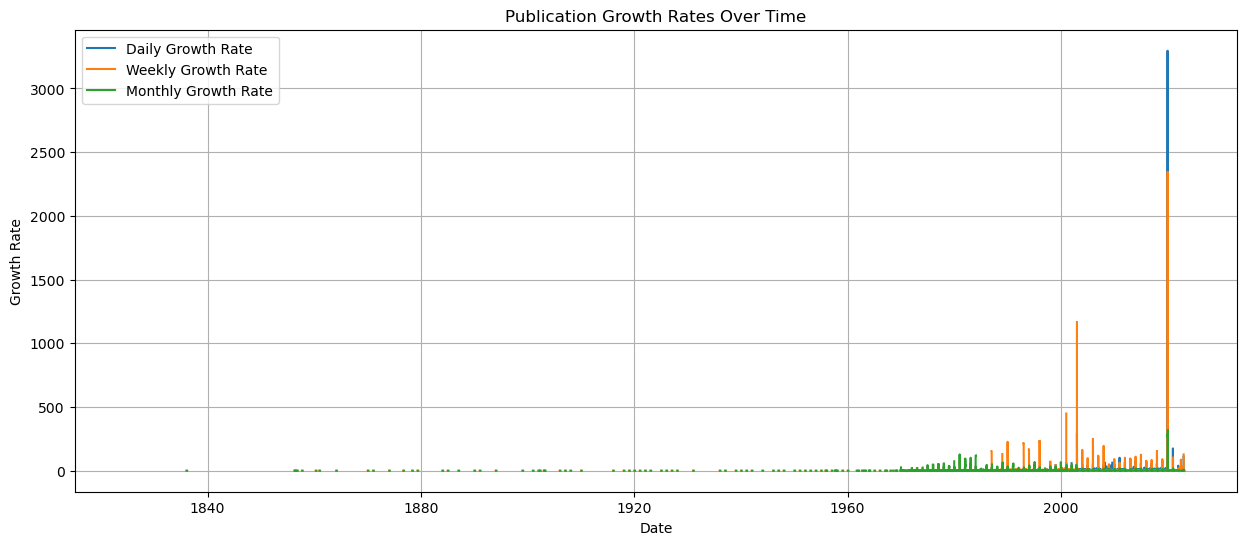

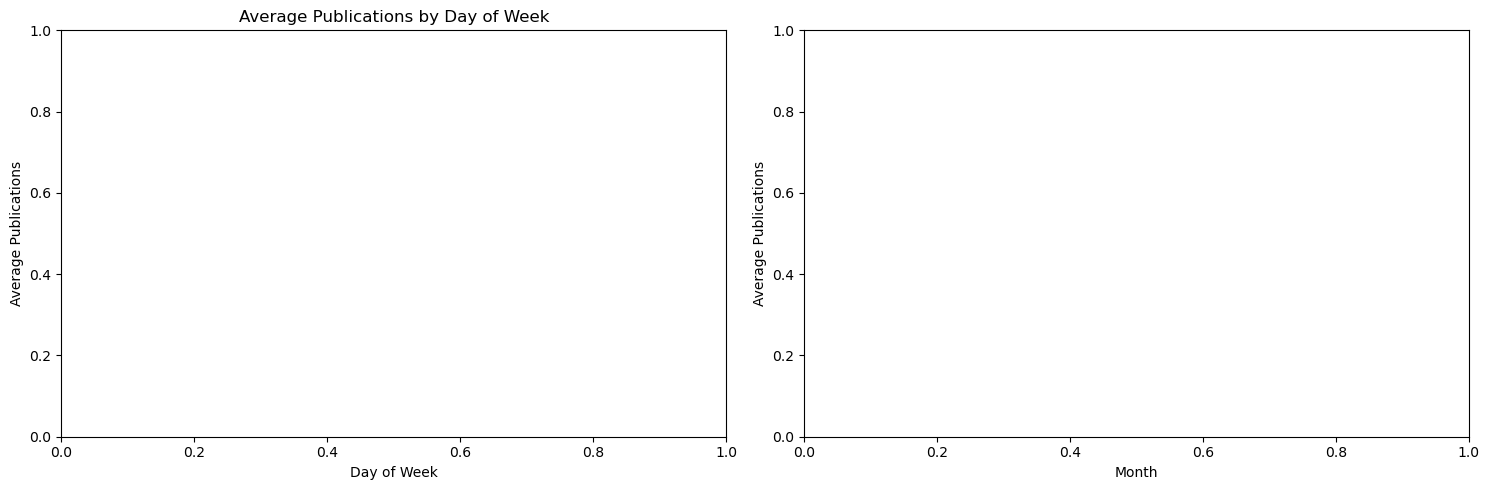


Key Insights:
--------------------------------------------------
Average daily growth rate: inf%
Publication count volatility (30-day): 43.92
Day-of-week effect (std): 11.21
Average publication acceleration: nan%

Potential New Features for Model Enhancement:
Variables highly correlated with daily count:
- 7day_moving_avg
- daily_growth_rate
- relative_to_prev_week
- relative_to_prev_month
- cumulative_growth_rate
- 7day_volatility
- publication_acceleration
- weekly_acceleration


In [27]:
# Example usage:
if ts_results[0] is not None:
    ts_predictions, ts_model, historical_data = ts_results
    
    # Create derived variables
    derived_df = create_derived_variables(df, historical_data)
    
    if derived_df is not None:
        # Analyze derived variables
        correlation_matrix = analyze_derived_variables(derived_df)
        
        # Print key insights
        print("\nKey Insights:")
        print("-" * 50)
        
        # Growth trends
        avg_growth = derived_df['daily_growth_rate'].mean()
        print(f"Average daily growth rate: {avg_growth:.2%}")
        
        # Volatility
        print(f"Publication count volatility (30-day): {derived_df['30day_volatility'].mean():.2f}")
        
        # Seasonal patterns
        dow_effect = derived_df.groupby('day_of_week')['daily_count'].mean().std()
        print(f"Day-of-week effect (std): {dow_effect:.2f}")
        
        # Acceleration
        avg_acceleration = derived_df['publication_acceleration'].mean()
        print(f"Average publication acceleration: {avg_acceleration:.2%}")
        
        # Additional model features
        print("\nPotential New Features for Model Enhancement:")
        high_corr_vars = correlation_matrix['daily_count'][
            (correlation_matrix['daily_count'].abs() > 0.3) & 
            (correlation_matrix['daily_count'].abs() < 1.0)
        ].index.tolist()
        print("Variables highly correlated with daily count:")
        for var in high_corr_vars:
            print(f"- {var}")



Derived Variables Analysis:

Basic Statistics:
         daily_count  7day_moving_avg  30day_moving_avg  daily_growth_rate  \
count   72794.000000     72794.000000      72794.000000       72794.000000   
mean       14.490837        14.490847         14.490865           0.117202   
std      1184.419383       455.409502        232.526064          12.367971   
min         0.000000         0.000000          0.000000          -1.000000   
25%         0.000000         0.000000          0.000000           0.000000   
50%         0.000000         0.000000          0.000000           0.000000   
75%         0.000000         0.000000          0.033333           0.000000   
max    234967.000000     34155.285714       8388.200000        3295.890625   

       weekly_growth_rate  monthly_growth_rate  relative_to_prev_week  \
count        72794.000000         72794.000000           72794.000000   
mean             0.471546             0.531652               1.628140   
std             21.006581     

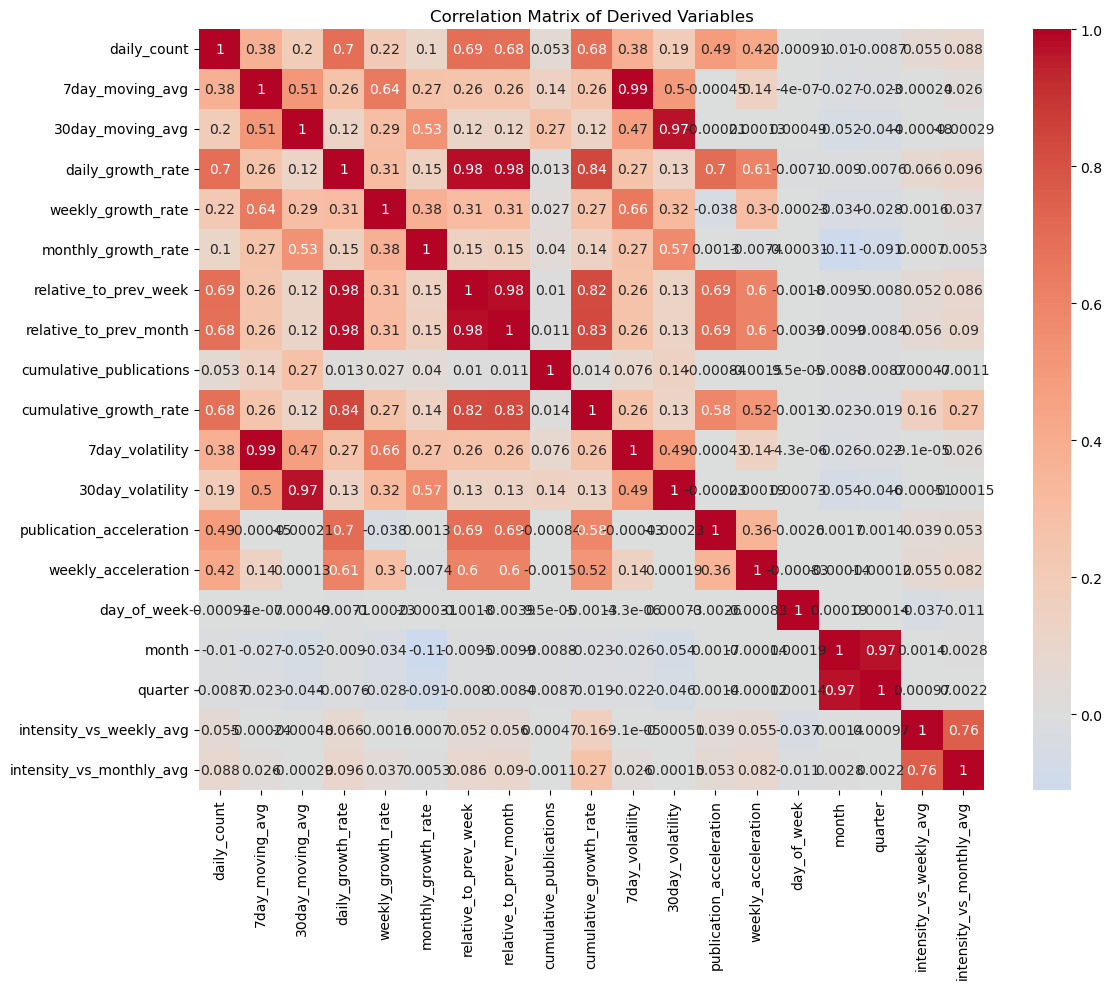

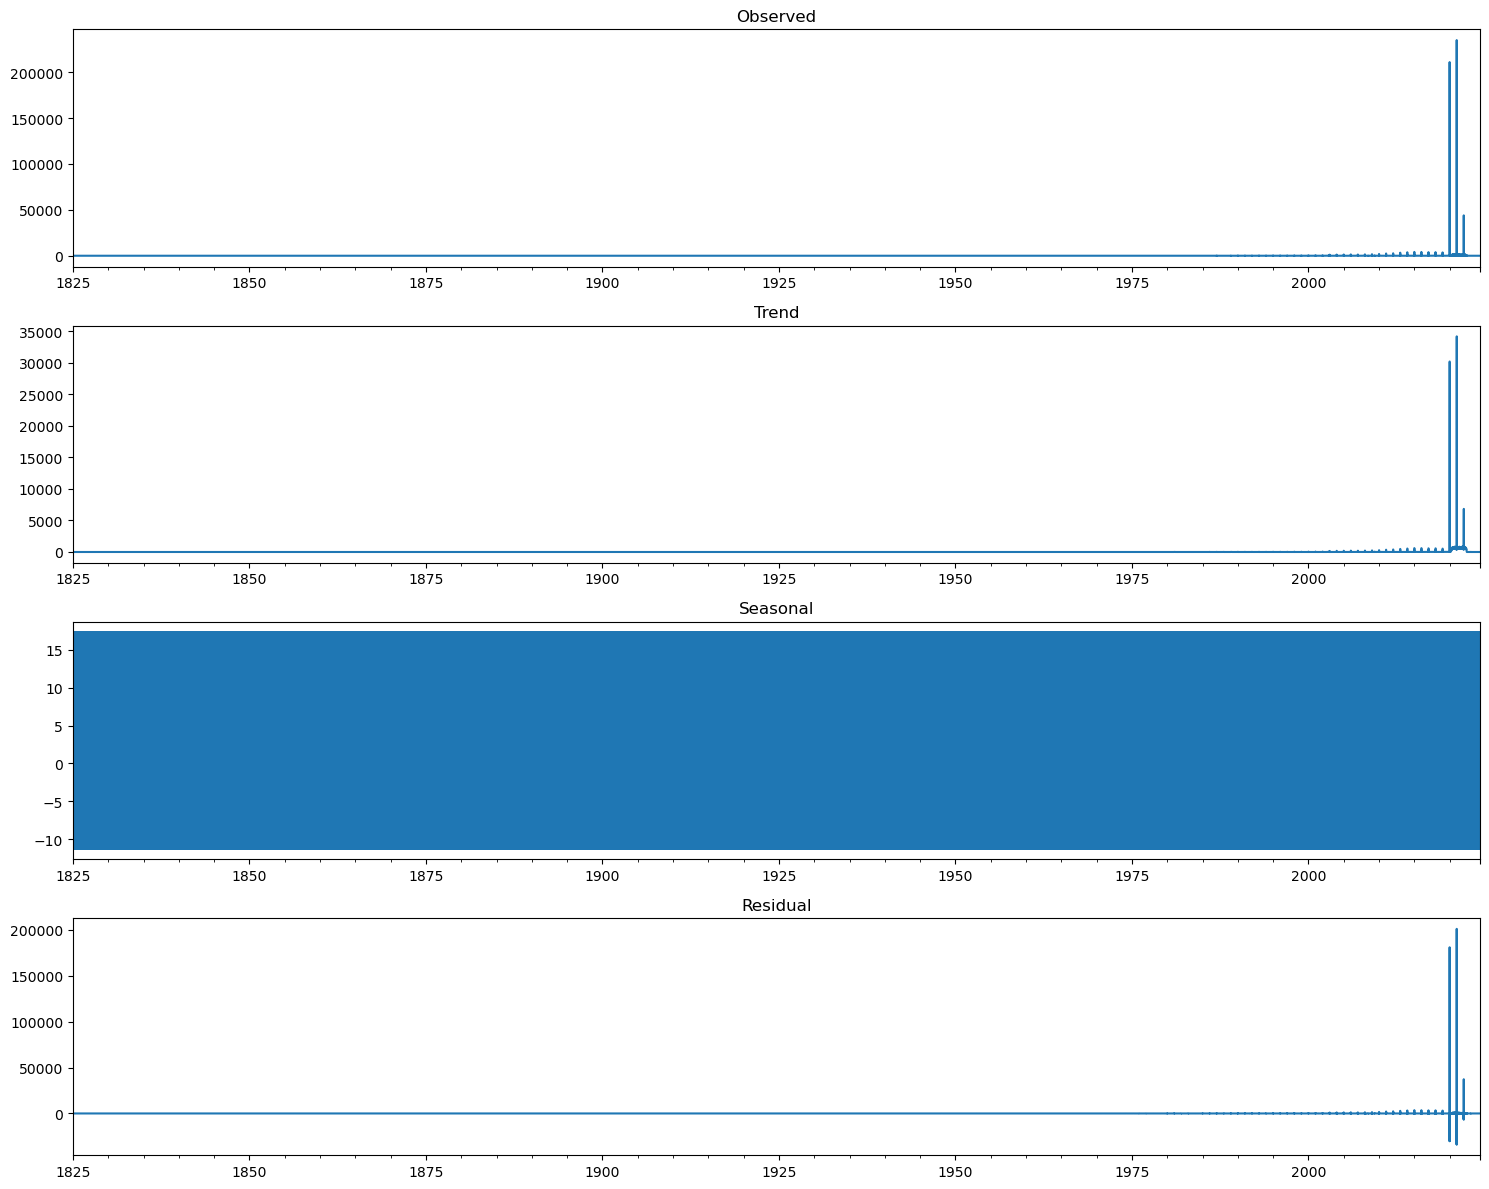

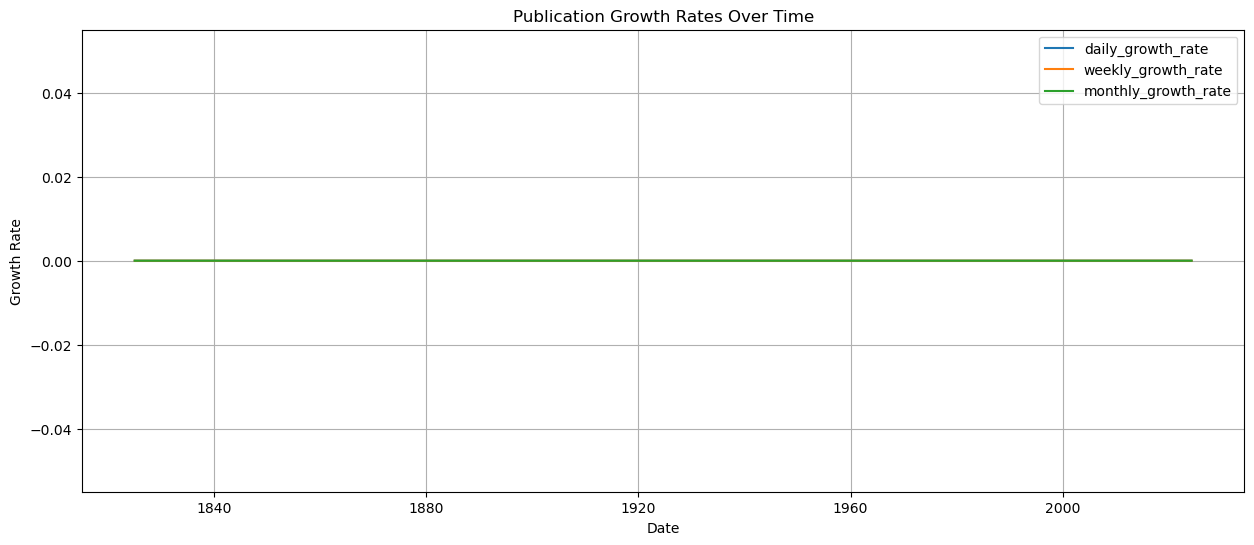

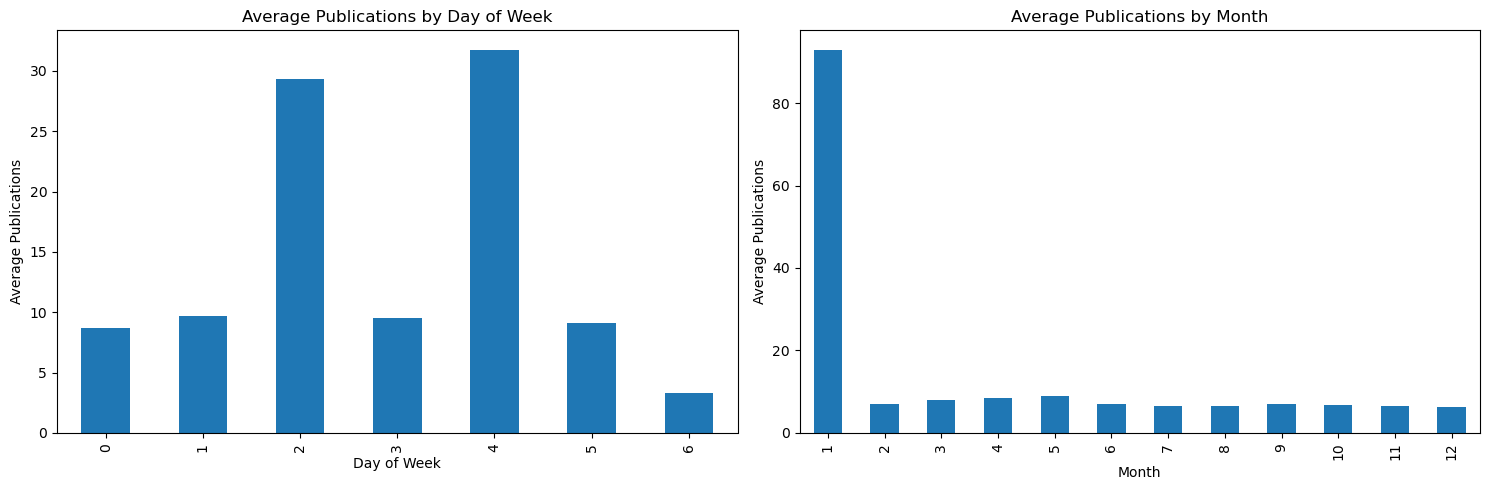


Key Insights:
--------------------------------------------------
Average daily growth rate: 11.72%
Publication count volatility (30-day): 43.90
Day-of-week effect (std): 11.21
Average publication acceleration: -2.07%

Potential New Features for Model Enhancement:
Variables highly correlated with daily count:
- 7day_moving_avg
- daily_growth_rate
- relative_to_prev_week
- relative_to_prev_month
- cumulative_growth_rate
- 7day_volatility
- publication_acceleration
- weekly_acceleration


In [28]:
def create_derived_variables(df, historical_data):
    """
    Create derived variables from the publication data with robust handling of missing/invalid values
    """
    try:
        # Convert to DataFrame if Series
        if isinstance(historical_data, pd.Series):
            derived_df = historical_data.to_frame('daily_count')
        else:
            derived_df = historical_data.copy()
            
        # Ensure no negative values
        derived_df['daily_count'] = derived_df['daily_count'].clip(lower=0)
        
        # 1. Rolling statistics (with min_periods to handle edge cases)
        derived_df['7day_moving_avg'] = derived_df['daily_count'].rolling(
            window=7, min_periods=1).mean()
        derived_df['30day_moving_avg'] = derived_df['daily_count'].rolling(
            window=30, min_periods=1).mean()
        
        # 2. Growth rates (handle division by zero)
        derived_df['daily_growth_rate'] = derived_df['daily_count'].pct_change().fillna(0)
        derived_df['weekly_growth_rate'] = derived_df['7day_moving_avg'].pct_change(7).fillna(0)
        derived_df['monthly_growth_rate'] = derived_df['30day_moving_avg'].pct_change(30).fillna(0)
        
        # 3. Relative changes (with safe division)
        derived_df['relative_to_prev_week'] = (
            derived_df['daily_count'] / 
            derived_df['daily_count'].shift(7).replace(0, np.nan)
        ).fillna(1)
        
        derived_df['relative_to_prev_month'] = (
            derived_df['daily_count'] / 
            derived_df['daily_count'].shift(30).replace(0, np.nan)
        ).fillna(1)
        
        # 4. Cumulative metrics
        derived_df['cumulative_publications'] = derived_df['daily_count'].cumsum()
        derived_df['cumulative_growth_rate'] = derived_df['cumulative_publications'].pct_change().fillna(0)
        
        # 5. Volatility measures (with min_periods)
        derived_df['7day_volatility'] = derived_df['daily_count'].rolling(
            window=7, min_periods=1).std().fillna(0)
        derived_df['30day_volatility'] = derived_df['daily_count'].rolling(
            window=30, min_periods=1).std().fillna(0)
        
        # 6. Acceleration metrics (with safe differencing)
        derived_df['publication_acceleration'] = derived_df['daily_growth_rate'].diff().fillna(0)
        derived_df['weekly_acceleration'] = derived_df['weekly_growth_rate'].diff().fillna(0)
        
        # 7. Seasonal components
        derived_df['day_of_week'] = derived_df.index.dayofweek
        derived_df['month'] = derived_df.index.month
        derived_df['quarter'] = derived_df.index.quarter
        
        # 8. Relative intensity metrics (with safe division)
        derived_df['intensity_vs_weekly_avg'] = (
            derived_df['daily_count'] / 
            derived_df['7day_moving_avg'].replace(0, np.nan)
        ).fillna(1)
        
        derived_df['intensity_vs_monthly_avg'] = (
            derived_df['daily_count'] / 
            derived_df['30day_moving_avg'].replace(0, np.nan)
        ).fillna(1)
        
        # Replace infinite values with NaN and then fill with 0
        derived_df = derived_df.replace([np.inf, -np.inf], np.nan)
        derived_df = derived_df.fillna(0)
        
        return derived_df
        
    except Exception as e:
        print(f"Error in creating derived variables: {e}")
        return None

def analyze_derived_variables(derived_df):
    """
    Analyze and visualize the derived variables with robust handling of missing values
    """
    try:
        print("\nDerived Variables Analysis:")
        print("=" * 50)
        
        # 1. Basic statistics (excluding non-numeric columns)
        numeric_cols = derived_df.select_dtypes(include=[np.number]).columns
        print("\nBasic Statistics:")
        print(derived_df[numeric_cols].describe())
        
        # 2. Correlation analysis (with handling of constant columns)
        correlation_matrix = derived_df[numeric_cols].corr()
        
        # Remove columns that are all zeros or constant
        correlation_matrix = correlation_matrix.loc[
            correlation_matrix.std() != 0,
            correlation_matrix.std() != 0
        ]
        
        # Plot correlation heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, 
                   annot=True, 
                   cmap='coolwarm', 
                   center=0,
                   mask=np.isnan(correlation_matrix))
        plt.title('Correlation Matrix of Derived Variables')
        plt.tight_layout()
        plt.show()
        
        # 3. Time series decomposition (with robust period detection)
        if len(derived_df) >= 14:  # Ensure enough data points
            decomposition = seasonal_decompose(
                derived_df['daily_count'],
                period=7,
                extrapolate_trend='freq'
            )
            
            fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
            decomposition.observed.plot(ax=ax1)
            ax1.set_title('Observed')
            decomposition.trend.plot(ax=ax2)
            ax2.set_title('Trend')
            decomposition.seasonal.plot(ax=ax3)
            ax3.set_title('Seasonal')
            decomposition.resid.plot(ax=ax4)
            ax4.set_title('Residual')
            plt.tight_layout()
            plt.show()
        
        # 4. Growth rate analysis (with outlier removal)
        plt.figure(figsize=(15, 6))
        for col in ['daily_growth_rate', 'weekly_growth_rate', 'monthly_growth_rate']:
            # Remove extreme outliers for visualization
            series = derived_df[col]
            q1, q3 = series.quantile([0.25, 0.75])
            iqr = q3 - q1
            mask = (series >= q1 - 1.5*iqr) & (series <= q3 + 1.5*iqr)
            plt.plot(derived_df.index[mask], series[mask], label=col)
            
        plt.title('Publication Growth Rates Over Time')
        plt.xlabel('Date')
        plt.ylabel('Growth Rate')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # 5. Seasonal patterns
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Day of week patterns
        dow_means = derived_df.groupby('day_of_week')['daily_count'].mean()
        dow_means.plot(kind='bar', ax=ax1)
        ax1.set_title('Average Publications by Day of Week')
        ax1.set_xlabel('Day of Week')
        ax1.set_ylabel('Average Publications')
        
        # Monthly patterns
        month_means = derived_df.groupby('month')['daily_count'].mean()
        month_means.plot(kind='bar', ax=ax2)
        ax2.set_title('Average Publications by Month')
        ax2.set_xlabel('Month')
        ax2.set_ylabel('Average Publications')
        
        plt.tight_layout()
        plt.show()
        
        return correlation_matrix
        
    except Exception as e:
        print(f"Error in analyzing derived variables: {e}")
        return None

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Example usage with error handling
if ts_results[0] is not None:
    ts_predictions, ts_model, historical_data = ts_results
    
    # Create derived variables
    derived_df = create_derived_variables(df, historical_data)
    
    if derived_df is not None:
        # Analyze derived variables
        correlation_matrix = analyze_derived_variables(derived_df)
        
        if correlation_matrix is not None:
            # Print key insights
            print("\nKey Insights:")
            print("-" * 50)
            
            # Growth trends (with safe calculation)
            avg_growth = derived_df['daily_growth_rate'].mean()
            print(f"Average daily growth rate: {avg_growth:.2%}")
            
            # Volatility (with safe calculation)
            volatility = derived_df['30day_volatility'].mean()
            print(f"Publication count volatility (30-day): {volatility:.2f}")
            
            # Seasonal patterns (with safe calculation)
            dow_effect = derived_df.groupby('day_of_week')['daily_count'].mean().std()
            print(f"Day-of-week effect (std): {dow_effect:.2f}")
            
            # Acceleration (with safe calculation)
            avg_acceleration = derived_df['publication_acceleration'].mean()
            print(f"Average publication acceleration: {avg_acceleration:.2%}")
            
            # Additional model features
            print("\nPotential New Features for Model Enhancement:")
            high_corr_vars = correlation_matrix['daily_count'][
                (correlation_matrix['daily_count'].abs() > 0.3) & 
                (correlation_matrix['daily_count'].abs() < 1.0)
            ].index.tolist()
            print("Variables highly correlated with daily count:")
            for var in high_corr_vars:
                print(f"- {var}")
